<a href="https://colab.research.google.com/github/swapnilxi/a-computer-vision/blob/main/Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# flat chess

In [ ]:
# prompt: displaying the image after reading from drive , flat_chess

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
drive.mount('/content/drive')

# # flat chess
image_path = '/content/drive/MyDrive/flat_chess.jpg' # Replace with your image path
try:
  img = cv2.imread(image_path)
  if img is None:
    print(f"Error: Could not read image at {image_path}")
  else:
    # Convert BGR to RGB for Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
except Exception as e:
  print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: Could not read image at /content/drive/MyDrive/flat_chess.jpg


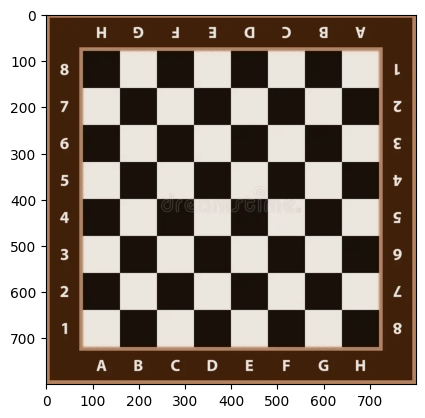

In [ ]:
flat_chess= cv2.imread('/content/drive/MyDrive/Colab Notebooks/ComputerVision/ImageData/chessboard_black.webp')
flat_chess= cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)


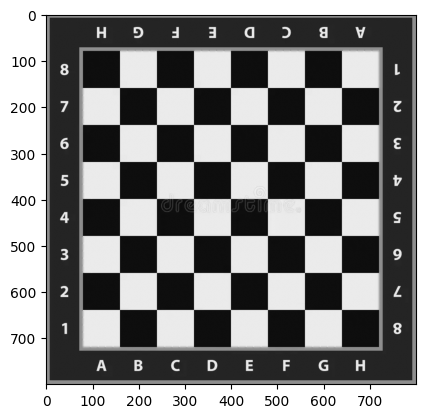

In [ ]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

#Real chess

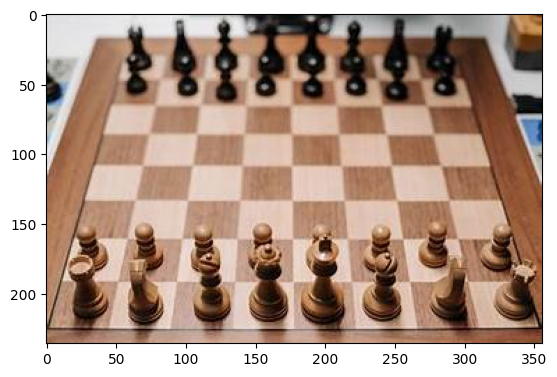

In [ ]:
real_chess= cv2.imread('/content/drive/MyDrive/Colab Notebooks/ComputerVision/ImageData/real_chess.jpeg')
real_chess= cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

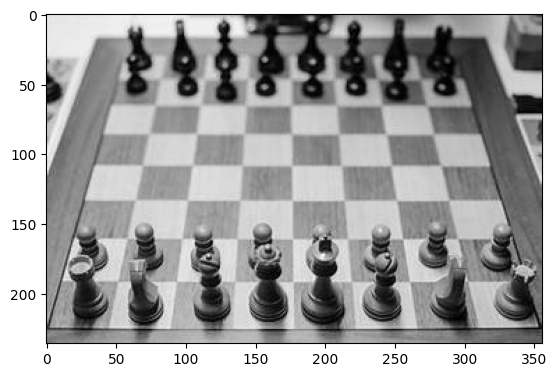

In [ ]:
gray_real_chess= cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap="gray")

In [ ]:
print(gray_flat_chess)

[[141 141 141 ... 142 142 142]
 [141 141 141 ... 142 142 142]
 [141 141 141 ... 142 142 142]
 ...
 [142 142 142 ... 142 142 142]
 [142 142 142 ... 142 142 142]
 [142 142 142 ... 142 142 142]]


#corner detection


### Harris Corner Detection
Harris Corner Detection Requires Gradients
The Harris algorithm computes image gradients (derivatives in x and y directions) using operations like Sobel filters. These gradients are floating-point values (e.g., -0.5, 1.234), not integers.

Using float32 ensures these intermediate calculations retain precision and avoid truncation errors.

> For this reason we need to convert the values in float32

convert the values in float32 values  

#### Without float32:
- If gray_flat_chess is uint8 (e.g., values 0-255), operations like
  gradient calculations (Ix, Iy) would lose precision or overflow, leading to incorrect corners.



In [ ]:
gray = np.float32(gray_flat_chess)
print(gray)

[[141. 141. 141. ... 142. 142. 142.]
 [141. 141. 141. ... 142. 142. 142.]
 [141. 141. 141. ... 142. 142. 142.]
 ...
 [142. 142. 142. ... 142. 142. 142.]
 [142. 142. 142. ... 142. 142. 142.]
 [142. 142. 142. ... 142. 142. 142.]]


### cv2.cornerHarris(src, blockSize, ksize, k)

#### dst
dst stands for "destination": It is the output matrix of the Harris corner detection process.
#### Ksize and k  
ksize: Controls the size of the Sobel kernel used to compute gradients.

Use ksize=3 for most cases.
- Uses a 3x3 Sobel kernel.
- A larger ksize means a larger kernel, which results in smoother gradient calculations (less sensitive to noise but may miss fine details).

k: Controls the sensitivity of the corner detector.

Use k=0.04 as a starting point, and adjust based on your needs.

In [ ]:
dst = cv2.cornerHarris( src= gray,blockSize= 2,ksize=3, k=0.04)

#### Dilation
Dilation is used to expand bright regions in an image.

In corner detection, it helps enhance the corner response map (dst) by making corners more visible.

The cv2.dilate function takes two arguments:

dst: The input image (corner response map in this case).

None: The kernel (if None, a default 3x3 rectangular kernel is used).

In [ ]:
dst = cv2.dilate(dst,None)

### Detecting corner with threshold
dst > 0.01 * dst.max():

dst is the output of cv2.cornerHarris, which is a floating-point matrix where each pixel value represents the "corner strength" at that location.

0.01 * dst.max() is a threshold value. Pixels in dst with values greater than this threshold are considered corners.

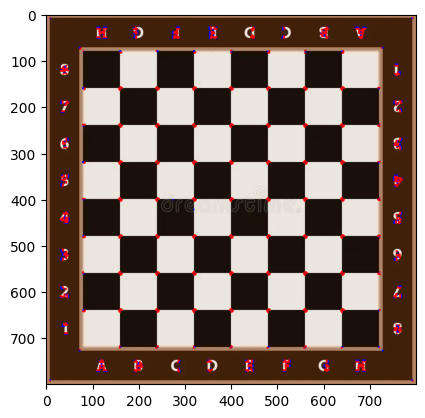

In [ ]:
flat_chess[dst>0.05*dst.max()]=[255,0,0]
plt.imshow(flat_chess)

### corner detection on Real chess

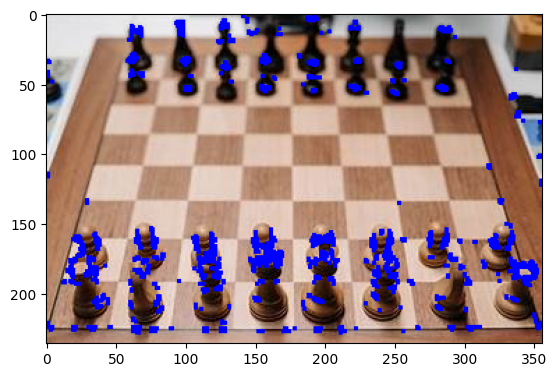

In [ ]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
real_chess[dst > 0.02 * dst.max()] = [0, 0, 255]  # Adjust the threshold as needed
plt.imshow(real_chess)


## Shi-tomashi corner Detection - Good features to track

In [ ]:
flat_chess= cv2.imread('/content/drive/MyDrive/Colab Notebooks/ComputerVision/ImageData/chessboard_black.webp')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

In [ ]:
real_chess= cv2.imread('/content/drive/MyDrive/Colab Notebooks/ComputerVision/ImageData/real_chess.jpeg')
real_chess= cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
gray_real_chess= cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)


if you want to track all the corners you have to put -1 to track all the features

corners = cv2.goodFeaturesToTrack(image, maxCorners, qualityLevel, minDistance[, corners[, mask[, blockSize[, useHarrisDetector[, k]]]]])



maxCorners: Maximum number of corners to return. If there are more corners than this, the strongest ones are returned. If negative (e.g., -1), all corners are returned.


 the **quality level**. It's a value between 0 and 1 that acts as a threshold. Only corners with a quality measure greater than this value will be considered. A lower value will detect more corners (but potentially weaker ones), and a higher value will detect fewer corners (but potentially stronger and more reliable ones)


 Output vector of detected corners. This is the minimum distance between detected corners. This ensures that corners are spaced apart and not clustered together too closely.

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,15,0.01,10)
corners

array([[[320., 320.]],

       [[320., 160.]],

       [[160., 320.]],

       [[160., 160.]],

       [[560., 319.]],

       [[319., 239.]],

       [[240., 319.]],

       [[240., 159.]],

       [[319., 560.]],

       [[159., 560.]],

       [[159., 400.]],

       [[560., 400.]],

       [[160., 239.]],

       [[400., 319.]],

       [[400., 159.]]], dtype=float32)

The corners need to be marked manually and for taht we need to covert it in int


<ipython-input-19-2f1383c1afeb>:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


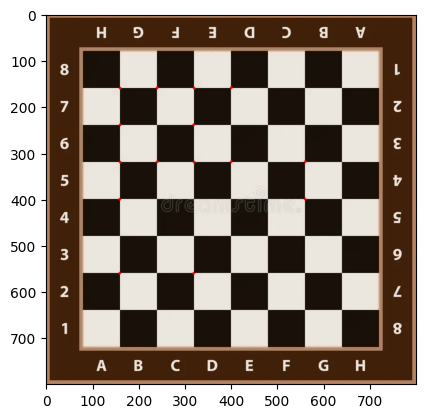

In [ ]:
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

<ipython-input-20-559aa73da23b>:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


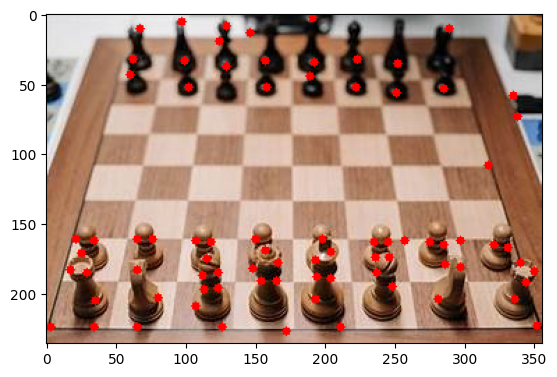

In [ ]:
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)

## Feature Detection


### Brute force Matcher with ORB
# Initiate ORB detector

 ### ORB (Oriented FAST and Rotated BRIEF) algorithm and a Brute-Force Matcher
- orb = cv2.ORB_create()
-
# find the keypoints and descriptors with ORB
- kp1, des1 = orb.detectAndCompute(reeses,None)
- kp2, des2 = orb.detectAndCompute(cereals,None)


- cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True):
This line creates a Brute-Force Matcher object (bf).



 crossCheck=True: This ensures that only consistent matches are considered, improving the quality of the matches.

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)


### Hamming distance
- Feature Descriptors: Feature descriptors are numerical representations of keypoints (interesting points) in an image. They are essentially binary strings or vectors.

- Comparison: When matching features between two images, we need to compare the descriptors of the keypoints to see how similar they are.

- **Hamming Distance** : Hamming distance is a measure of the difference between two binary strings or vectors of equal length. It represents the number of positions at which the corresponding elements are different.

- **Hamming Distance as a Similarity Measure: **A smaller Hamming distance between two descriptors indicates a higher similarity between the corresponding features.

 cv2.NORM_HAMMING:
 This argument specifies that the Hamming distance should be used to compare descriptors, which is suitable for ORB descriptors.

In [ ]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:

# Match descriptors.
matches = bf.match(des1,des2)

### Sort Matches:
sorted(matches, key = lambda x:x.distance): This line sorts the matches based on their distance. Matches with smaller distances are considered better and are placed at the beginning of the list.

- A lambda function is a small, anonymous function defined inline. It's convenient for creating simple functions that are only needed in one place.
In this case, the lambda function lambda x:x.distance is used as the key function.
- For each match object (x) in the matches list, the lambda function lambda x:x.distance is called.
The lambda function returns the distance attribute of the match object.

In [ ]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)


# Draw first 25 matches.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

## 2nd method- Brute-Force Matching with SIFT Descriptors and Ratio Test

cv2.xfeatures2d.SIFT_create(): This line creates a SIFT object, which is used to detect keypoints and compute descriptors in the images.

In [ ]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()
resses=

# find the keypoints and descriptors with SIFT
# large image
kp1, des1 = sift.detectAndCompute(reeses,None)
# section image
kp2, des2 = sift.detectAndCompute(cereals,None)

knnMatch is a method of the Brute-Force Matcher. It stands for "k-Nearest Neighbors Match". Instead of finding just the single best match for each feature, it finds the k best matches.

In [ ]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
  #if match 1 distance is less than 75% of match 2 distance it is good match
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

### SIFT (Scale-Invariant Feature Transform) algorithm, FLANN (Fast Library for Approximate Nearest Neighbors)
-
-

NameError: name 'cv2' is not defined

## FLANN
FLANN (Fast Library for Approximate Nearest Neighbors)

FLANN is a fast and scalable library for nearest neighbor search in large datasets. It is particularly useful in feature matching when dealing with high-dimensional descriptors, such as those extracted using SIFT, SURF, ORB, etc.

FLANN is designed to find the **nearest neighbor** of a feature descriptor efficiently using various indexing methods. It chooses the most suitable algorithm based on the dataset's properties.

FLANN Indexing Algorithms
FLANN supports multiple indexing methods:

Algorithm	FLANN Code	Best For
KD-Tree	algorithm=0	SIFT, SURF (floating-point data)
KMeans Tree	algorithm=1	Large datasets, approximate search
Composite Index	algorithm=3	General feature matching
Linear Search	algorithm=2	Small datasets (brute-force search)
Hierarchical Clustering	algorithm=4	Hierarchical clustering-based search